In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
path = "../../data_results/padding_left/Qwen3-1.7B"

In [3]:
def sum_dict(dict1, dict2):
    res = {}
    for key in dict1:
        res[key] = {}
        for second_key in dict1[key]:
            res[key][second_key] = (
                dict1[key][second_key] + 
                dict2[key][second_key]
            )
    return res

In [4]:
def harmonic_mean(refusal_score, over_refusal_score): 
    return (2*refusal_score*(100-over_refusal_score))/(refusal_score+(100-over_refusal_score))

def compute_df_harmonic(df_refusal, df_over_refusal):
    # Ensure the dataframes have the same shape
    if df_refusal.shape != df_over_refusal.shape:
        raise ValueError("DataFrames must have the same shape.")

    # Compute the satisfactory score for each element
    df_harmonic = df_refusal.combine(df_over_refusal, func=lambda ref, over_ref: harmonic_mean(ref, over_ref))

    return df_harmonic

### Analyse with or without WJ 

In [5]:
model_list = ["without_WJ", "en_with_diversity"]

## Analyze adding languages 

In [6]:
lg_list = [ "en", "fr", "pt", "zh", "ar", "lo", "tt", "mt", "pag", "fr_pt", "zh_ar", "pag_mt", "lo_tt"]


In [7]:
data_over_refusal = {}
data_refusal = {}

for lg in lg_list :
    epoch = 2.00
    if lg=="without_WJ": 
        model = "baseline_en"
        checkpoint=3800
    else : 
        model = lg
        checkpoint=3988
    path_ref_json = f"{path}/{model}/result_refusal_adversarial_{checkpoint}_left_padding.json"
    path_ove_json = f"{path}/{model}/result_over_refusal_adversarial_{checkpoint}_left_padding.json"
    path_inc_json = f"{path}/{model}/result_incertain_harmful_adversarial_{checkpoint}_left_padding.json"
    with open(path_ref_json) as json_file:
        data_ref = json.load(json_file)
    with open(path_ove_json) as json_file:
        data_over = json.load(json_file)
    with open(path_inc_json) as json_file:
        data_inc = json.load(json_file)


    data_r = sum_dict(data_ref, data_inc)
    data_refusal[lg] = data_r
    data_over_refusal[lg] = data_over
    

lg_eval=list(data_refusal["en"].keys())

In [8]:
import numpy as np
ref_all = []
over_all=[]
for lg_train in lg_list :
    satis_model = []
    ref_model = []
    over_model=[]
    for lg_ev in lg_eval : 
        ref = np.sum(list(data_refusal[lg_train][lg_ev].values()))
        over = np.sum(list(data_over_refusal[lg_train][lg_ev].values()))
        ref_model.append(ref)
        over_model.append(over)
    ref_all.append(pd.Series(ref_model, index=lg_eval))
    over_all.append(pd.Series(over_model, index=lg_eval))

df_ref = pd.concat(ref_all, axis=1, keys=lg_list)
df_over = pd.concat(over_all, axis=1, keys=lg_list)

In [9]:
df_ref_mean = df_ref.copy()
df_ref_mean.loc['mean']=df_ref_mean.mean()
df_ref_mean['mean']=df_ref_mean.mean(axis=1)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0.5, 0, 'en'),
  Text(1.5, 0, 'fr'),
  Text(2.5, 0, 'pt'),
  Text(3.5, 0, 'de'),
  Text(4.5, 0, 'es'),
  Text(5.5, 0, 'ja'),
  Text(6.5, 0, 'ar'),
  Text(7.5, 0, 'zh'),
  Text(8.5, 0, 'bn'),
  Text(9.5, 0, 'el'),
  Text(10.5, 0, 'da'),
  Text(11.5, 0, 'jv'),
  Text(12.5, 0, 'sw'),
  Text(13.5, 0, 'mk'),
  Text(14.5, 0, 'lo'),
  Text(15.5, 0, 'tt'),
  Text(16.5, 0, 'pag'),
  Text(17.5, 0, 'mt'),
  Text(18.5, 0, 'mean')])

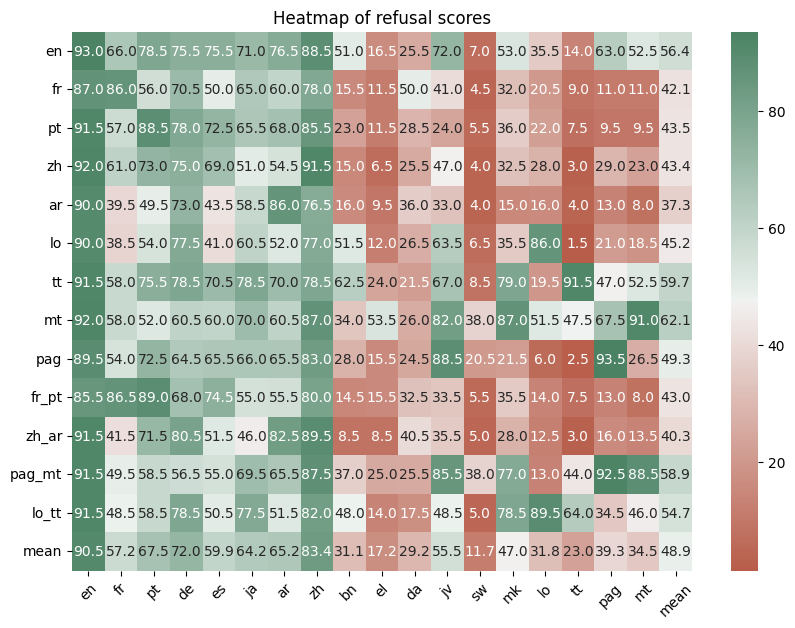

In [10]:
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(df_ref_mean.transpose(), annot=True, fmt=".1f", cmap=sns.diverging_palette(20, 145, s=60, as_cmap=True), ax=ax)
plt.title(f"Heatmap of refusal scores")
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 [Text(0.5, 0, 'en'),
  Text(1.5, 0, 'fr'),
  Text(2.5, 0, 'pt'),
  Text(3.5, 0, 'de'),
  Text(4.5, 0, 'es'),
  Text(5.5, 0, 'ja'),
  Text(6.5, 0, 'ar'),
  Text(7.5, 0, 'zh'),
  Text(8.5, 0, 'bn'),
  Text(9.5, 0, 'el'),
  Text(10.5, 0, 'da'),
  Text(11.5, 0, 'jv'),
  Text(12.5, 0, 'sw'),
  Text(13.5, 0, 'mk'),
  Text(14.5, 0, 'lo'),
  Text(15.5, 0, 'tt'),
  Text(16.5, 0, 'pag'),
  Text(17.5, 0, 'mt'),
  Text(18.5, 0, 'mean')])

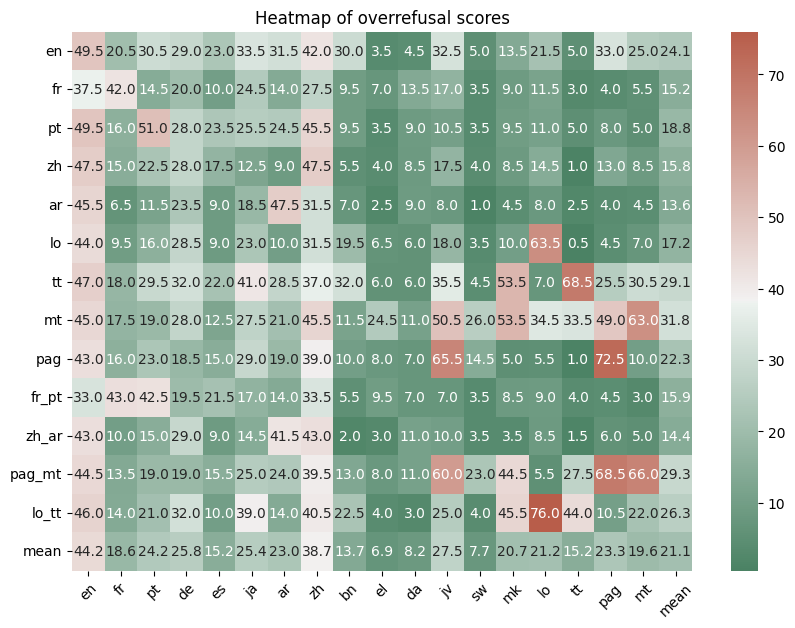

In [11]:
df_over_mean = df_over.copy()
df_over_mean.loc['mean']=df_over_mean.mean()
df_over_mean['mean']=df_over_mean.mean(axis=1)

fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(df_over_mean.transpose(), annot=True, fmt=".1f", cmap=sns.diverging_palette(145,20, s=60, as_cmap=True), ax=ax)
plt.title(f"Heatmap of overrefusal scores")
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0.5, 0, 'en'),
  Text(1.5, 0, 'fr'),
  Text(2.5, 0, 'pt'),
  Text(3.5, 0, 'de'),
  Text(4.5, 0, 'es'),
  Text(5.5, 0, 'ja'),
  Text(6.5, 0, 'ar'),
  Text(7.5, 0, 'zh'),
  Text(8.5, 0, 'bn'),
  Text(9.5, 0, 'el'),
  Text(10.5, 0, 'da'),
  Text(11.5, 0, 'jv'),
  Text(12.5, 0, 'sw'),
  Text(13.5, 0, 'mk'),
  Text(14.5, 0, 'lo'),
  Text(15.5, 0, 'tt'),
  Text(16.5, 0, 'pag'),
  Text(17.5, 0, 'mt'),
  Text(18.5, 0, 'mean'),
  Text(19.5, 0, 'std')])

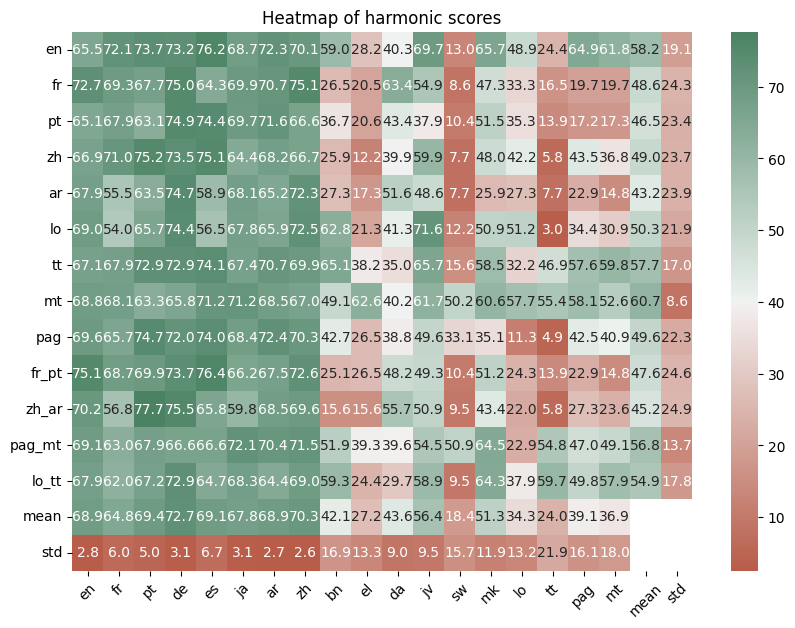

In [12]:
df_harmonic = compute_df_harmonic(df_ref, df_over)
df_harmonic_mean = df_harmonic.copy()
df_harmonic_mean.loc['mean']=df_harmonic.mean()
df_harmonic_mean['mean']=df_harmonic.mean(axis=1)
df_harmonic_mean.loc['std']=df_harmonic.copy().std()
df_harmonic_mean['std']=df_harmonic.copy().std(axis=1)

fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(df_harmonic_mean.transpose(), annot=True, fmt=".1f", cmap=sns.diverging_palette(20, 145, s=60, as_cmap=True), ax=ax)
plt.title(f"Heatmap of harmonic scores")
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0.5, 0, 'en'),
  Text(1.5, 0, 'fr'),
  Text(2.5, 0, 'pt'),
  Text(3.5, 0, 'de'),
  Text(4.5, 0, 'es'),
  Text(5.5, 0, 'ja'),
  Text(6.5, 0, 'ar'),
  Text(7.5, 0, 'zh'),
  Text(8.5, 0, 'bn'),
  Text(9.5, 0, 'el'),
  Text(10.5, 0, 'da'),
  Text(11.5, 0, 'jv'),
  Text(12.5, 0, 'sw'),
  Text(13.5, 0, 'mk'),
  Text(14.5, 0, 'lo'),
  Text(15.5, 0, 'tt'),
  Text(16.5, 0, 'pag'),
  Text(17.5, 0, 'mt'),
  Text(18.5, 0, 'mean'),
  Text(19.5, 0, 'std')])

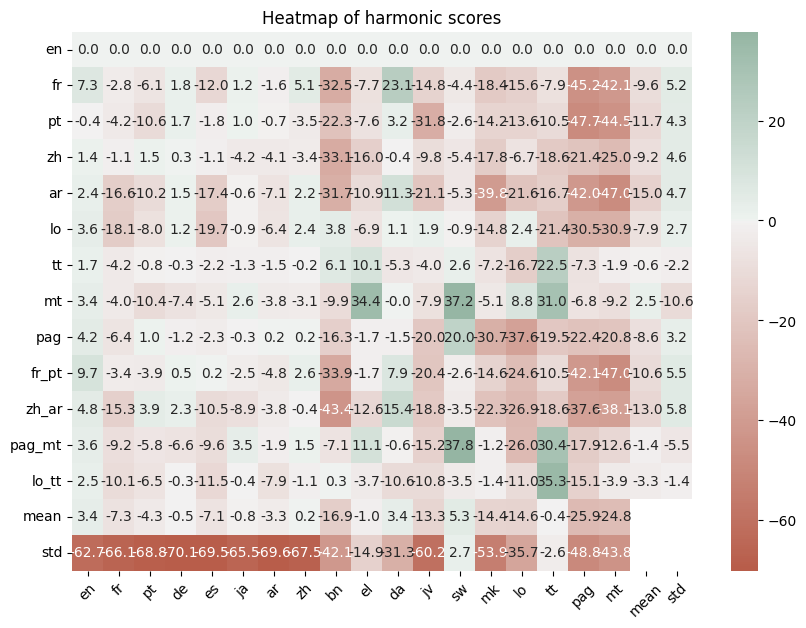

In [13]:
row_en = df_harmonic_mean["en"]
df_harmonic_diff = df_harmonic_mean.apply(lambda x: x - row_en)

fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(df_harmonic_diff.transpose(), annot=True, fmt=".1f", cmap=sns.diverging_palette(20, 145, s=60, as_cmap=True), ax=ax, center=0)
plt.title(f"Heatmap of harmonic scores")
plt.xticks(rotation=45)

/var/folders/2q/yvjnzdxd1b9bjpjqhmjv1qq00000gn/T/ipykernel_2361/2411188255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(compute_df_harmonic(df_ref, df_over).transpose().mean(), palette="Set2")


Text(0, 0.5, 'Harmonic scores')

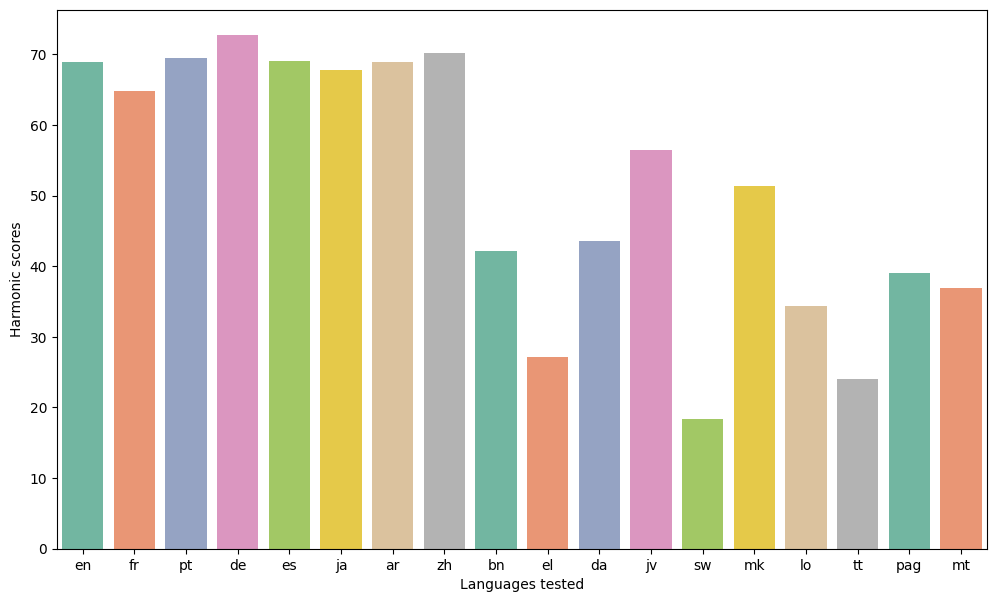

In [14]:
fig, ax = plt.subplots(figsize=(12,7))  
sns.barplot(compute_df_harmonic(df_ref, df_over).transpose().mean(), palette="Set2")
ax.set_xlabel('Languages tested')
ax.set_ylabel('Harmonic scores')

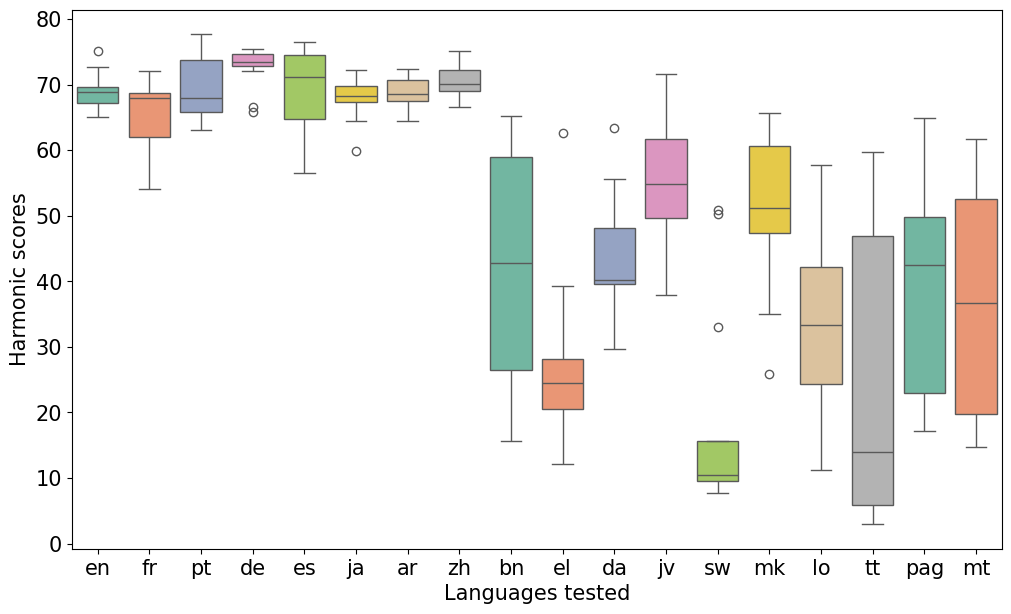

In [15]:
fig, ax = plt.subplots(figsize=(12,7))  
sns.boxplot(compute_df_harmonic(df_ref, df_over).transpose(), palette="Set2")
ax.set_xlabel('Languages tested',  fontsize=15)
ax.set_ylabel('Harmonic scores',  fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

In [16]:
df = pd.DataFrame(compute_df_harmonic(df_ref, df_over)['en'])
df['cat']=["High"]*8+["Medium"]*3+["Low"]*7 

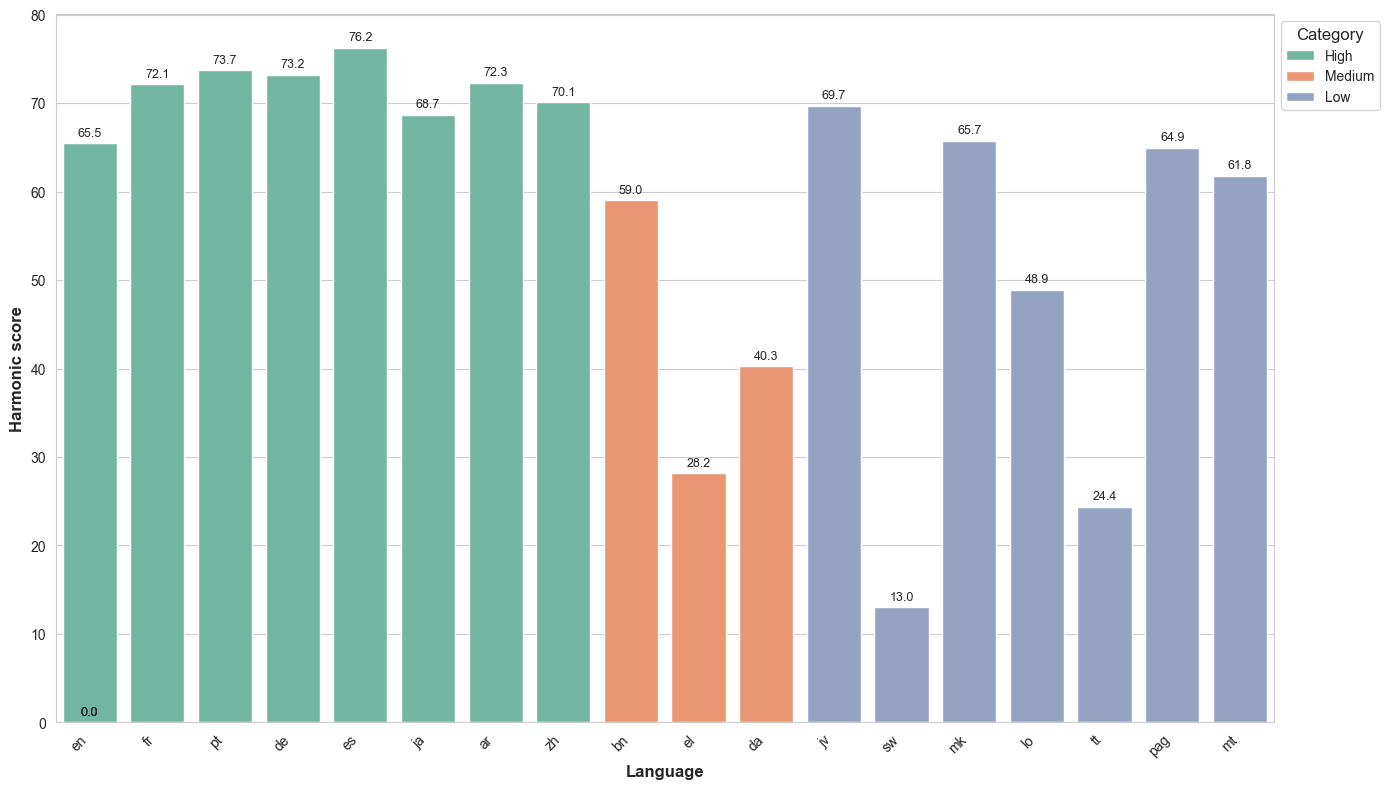

In [17]:

# Set up the plot style
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Create color palette for categories
colors = ["#66c2a5", "#fc8d62", '#8da0cb']  # blue, green, orange, red
category_colors = {'High': colors[0], 'Medium': colors[1], 'Low': colors[2]}

# Create the bar plot
ax = sns.barplot(data=df, 
                 x=df.index, 
                 y='en', 
                 hue='cat',
                 palette=category_colors,
                 dodge=False)

plt.xlabel('Language', fontsize=12, fontweight='bold')
plt.ylabel('Harmonic score', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# Customize legend
plt.legend(title='Category', title_fontsize=12, fontsize=10, 
           bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
high_lg = ['en','fr','pt', 'de', 'es','ja', 'ar', 'zh']
middle_lg = ['bn', 'el', 'da']
low_lg = ['jv', 'sw', 'mk' , 'lo', 'tt', 'pag', 'mt']

In [19]:
df_high=df_ref[df_ref.index.isin(high_lg)]
df_medium=df_ref[df_ref.index.isin(middle_lg)]
df_low=df_ref[df_ref.index.isin(low_lg)]
df_cat_ref=pd.concat([ df_high.mean(), df_medium.mean(),df_low.mean()], keys=["High", "Medium", "Low"], axis=1)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'en'),
  Text(1.5, 0, 'fr'),
  Text(2.5, 0, 'pt'),
  Text(3.5, 0, 'zh'),
  Text(4.5, 0, 'ar'),
  Text(5.5, 0, 'lo'),
  Text(6.5, 0, 'tt'),
  Text(7.5, 0, 'mt'),
  Text(8.5, 0, 'pag'),
  Text(9.5, 0, 'fr_pt'),
  Text(10.5, 0, 'zh_ar'),
  Text(11.5, 0, 'pag_mt'),
  Text(12.5, 0, 'lo_tt')])

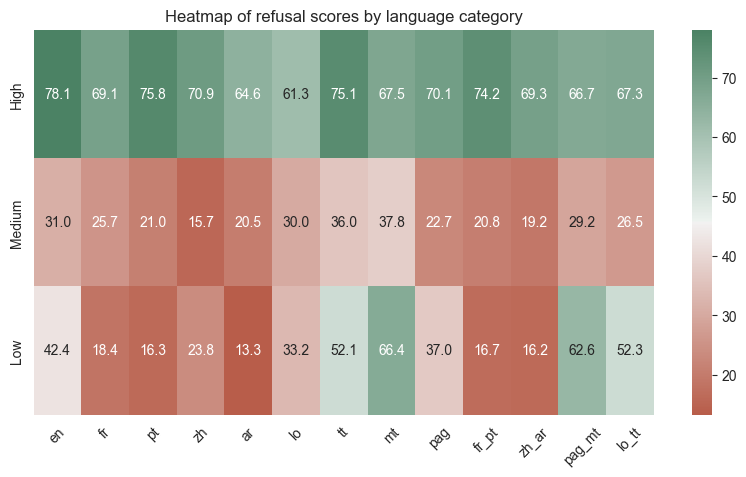

In [20]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(df_cat_ref.transpose(), annot=True, fmt=".1f", cmap=sns.diverging_palette(20, 145, s=60, as_cmap=True), ax=ax)
plt.title(f"Heatmap of refusal scores by language category")
plt.xticks(rotation=45)

In [21]:
df_ref_with_cat =df_ref.copy()
df_ref_with_cat['cat'] = ["high"]*8+["medium"]*3+["low"]*7 

df_over_with_cat =df_over.copy()
df_over_with_cat['cat'] = ["high"]*8+["medium"]*3+["low"]*7 

df_harmonic = compute_df_harmonic(df_ref.copy(), df_over.copy())
df_harmonic_with_cat =df_harmonic.copy()
df_harmonic_with_cat['cat'] = ["high"]*8+["medium"]*3+["low"]*7 



Text(0, 0.5, 'Harmonic scores')

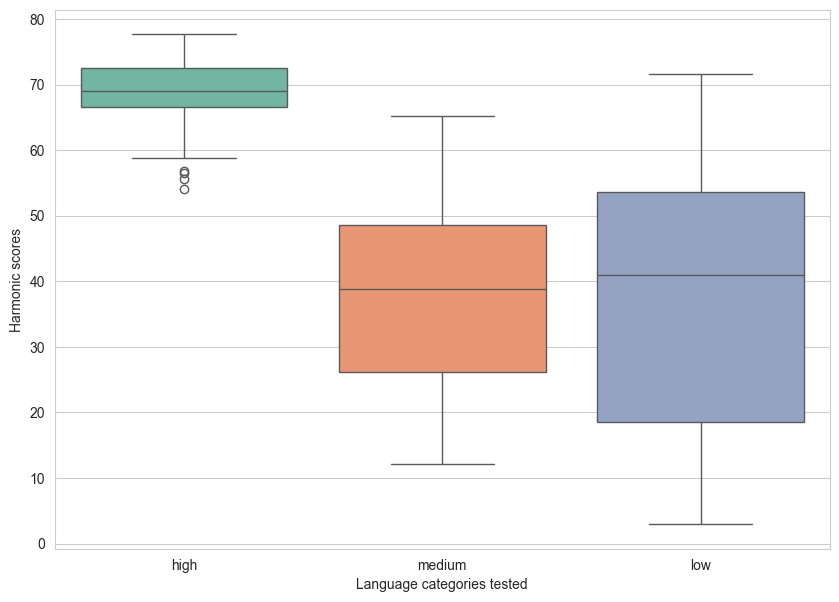

In [22]:

# Melt the DataFrame to long format for easier plotting with seaborn
df_melted = df_harmonic_with_cat.melt(id_vars=['cat'], value_vars=df_harmonic_with_cat.columns.drop('cat'), var_name='language', value_name='value')

# Plot the boxplot using seaborn
fig, ax = plt.subplots(figsize=(10,7))  
sns.boxplot(data=df_melted, x='cat', y='value', hue='cat', palette='Set2', legend=False)

ax.set_xlabel('Language categories tested')
ax.set_ylabel('Harmonic scores')

In [23]:

df_high_over=df_over[df_over.index.isin(high_lg)]
df_medium_over=df_over[df_over.index.isin(middle_lg)]
df_low_over=df_over[df_over.index.isin(low_lg)]
df_cat_over=pd.concat([ df_high_over.mean(), df_medium_over.mean(),df_low_over.mean()], keys=["High", "Medium", "Low"], axis=1)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'en'),
  Text(1.5, 0, 'fr'),
  Text(2.5, 0, 'pt'),
  Text(3.5, 0, 'zh'),
  Text(4.5, 0, 'ar'),
  Text(5.5, 0, 'lo'),
  Text(6.5, 0, 'tt'),
  Text(7.5, 0, 'mt'),
  Text(8.5, 0, 'pag'),
  Text(9.5, 0, 'fr_pt'),
  Text(10.5, 0, 'zh_ar'),
  Text(11.5, 0, 'pag_mt'),
  Text(12.5, 0, 'lo_tt')])

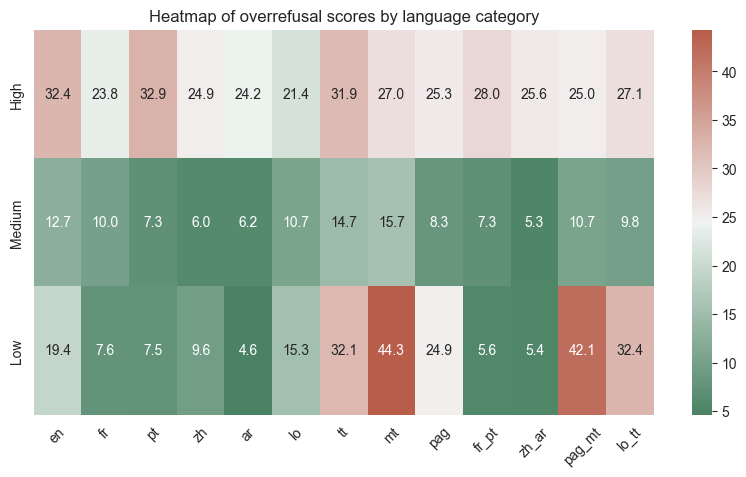

In [24]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(df_cat_over.transpose(), annot=True, fmt=".1f", cmap=sns.diverging_palette(145, 20, s=60, as_cmap=True), ax=ax)
plt.title(f"Heatmap of overrefusal scores by language category")
plt.xticks(rotation=45)

In [25]:
df_harmo_cat= compute_df_harmonic(df_cat_ref, df_cat_over)
row_en = df_harmo_cat.loc['en']
df_harmo_cat_diff = df_harmo_cat.apply(lambda x : x - row_en, axis=1)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'en'),
  Text(1.5, 0, 'fr'),
  Text(2.5, 0, 'pt'),
  Text(3.5, 0, 'zh'),
  Text(4.5, 0, 'ar'),
  Text(5.5, 0, 'lo'),
  Text(6.5, 0, 'tt'),
  Text(7.5, 0, 'mt'),
  Text(8.5, 0, 'pag'),
  Text(9.5, 0, 'fr_pt'),
  Text(10.5, 0, 'zh_ar'),
  Text(11.5, 0, 'pag_mt'),
  Text(12.5, 0, 'lo_tt')])

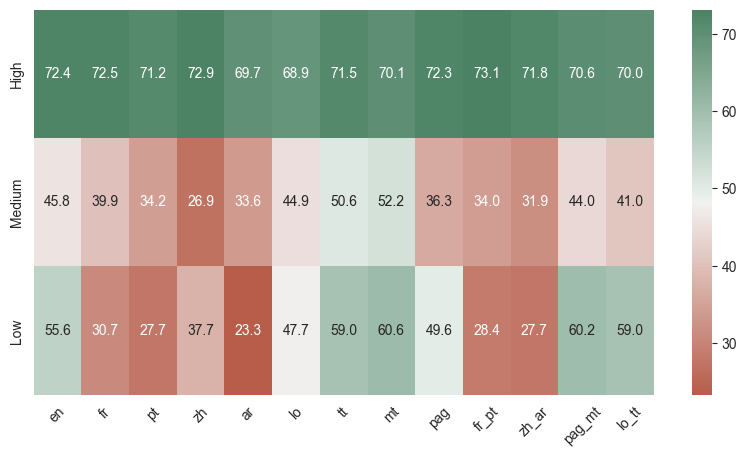

In [26]:

fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(df_harmo_cat.transpose(), annot=True, fmt=".1f", cmap=sns.diverging_palette(20, 145, s=60, as_cmap=True), ax=ax)
#plt.title(f"Heatmap of harmonic score by language category")
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'en'),
  Text(1.5, 0, 'fr'),
  Text(2.5, 0, 'pt'),
  Text(3.5, 0, 'zh'),
  Text(4.5, 0, 'ar'),
  Text(5.5, 0, 'lo'),
  Text(6.5, 0, 'tt'),
  Text(7.5, 0, 'mt'),
  Text(8.5, 0, 'pag'),
  Text(9.5, 0, 'fr_pt'),
  Text(10.5, 0, 'zh_ar'),
  Text(11.5, 0, 'pag_mt'),
  Text(12.5, 0, 'lo_tt')])

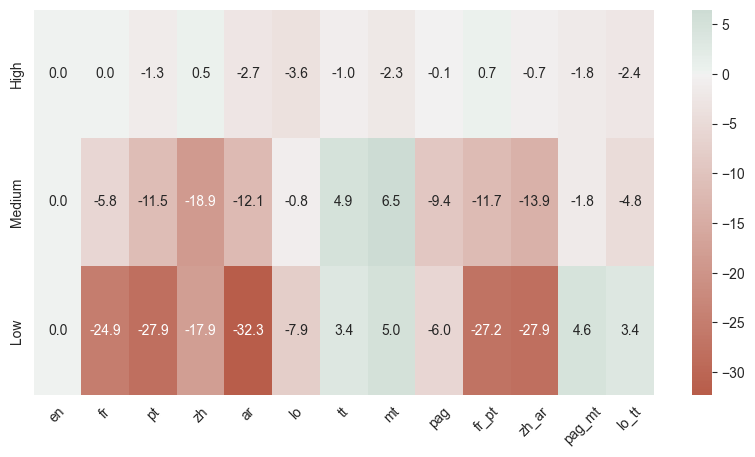

In [27]:

fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(df_harmo_cat_diff.transpose(), annot=True, fmt=".1f", cmap=sns.diverging_palette(20, 145, s=60, as_cmap=True), ax=ax, center=0)
#plt.title(f"Heatmap of harmonic score by language category")
plt.xticks(rotation=45)

In [28]:
dict_in = {}
dict_out = {}

dict_in_over = {}
dict_out_over = {}

dict_in_all = {}
dict_out_all = {}

dict_in_over_all = {}
dict_out_over_all = {}

dict_in_cat = {}
dict_out_cat = {}

dict_in_over_cat = {}
dict_out_over_cat = {}

dict_satis_in ={}
dict_satis_out ={}

for index in lg_list: 
    index_list=["en"]
    if "_" in index: 
        index_list.extend(index.split('_'))
    else : 
        if index!="en": 
            index_list.append(index)

    df_r = df_ref[index]
    df_o = df_over[index]
    df_in = df_r.loc[index_list]
    df_in_over = df_o.loc[index_list]

    index_out = df_r.index.difference(index_list)
    df_out = df_r.loc[index_out]
    df_out_over = df_o.loc[index_out]

    dict_in[index]= df_in.mean()
    dict_out[index]= df_out.mean()

    dict_in_over[index]= df_in_over.mean()
    dict_out_over[index]= df_out_over.mean()

    dict_in_all[index]= df_in
    dict_out_all[index]= df_out

    dict_in_over_all[index]= df_in_over
    dict_out_over_all[index]= df_out_over

    df_high_in=df_in[df_in.index.isin(high_lg)]
    df_medium_in=df_in[df_in.index.isin(middle_lg)]
    df_low_in=df_in[df_in.index.isin(low_lg)]
    df_cat_ref_in=pd.concat([pd.Series(df_high_in.mean()), pd.Series(df_medium_in.mean()),pd.Series(df_low_in.mean())], keys=["High", "Medium", "Low"], axis=1)

    df_high_in_over=df_in_over[df_in_over.index.isin(high_lg)]
    df_medium_in_over=df_in_over[df_in_over.index.isin(middle_lg)]
    df_low_in_over=df_in_over[df_in.index.isin(low_lg)]
    df_cat_over_in=pd.concat([pd.Series(df_high_in_over.mean()), pd.Series(df_medium_in_over.mean()),pd.Series(df_low_in_over.mean())], keys=["High", "Medium", "Low"], axis=1)

    df_high_out=df_out[df_out.index.isin(high_lg)]
    df_medium_out=df_out[df_out.index.isin(middle_lg)]
    df_low_out=df_out[df_out.index.isin(low_lg)]
    df_cat_ref_out=pd.concat([pd.Series(df_high_out.mean()), pd.Series(df_medium_out.mean()),pd.Series(df_low_out.mean())], keys=["High", "Medium", "Low"], axis=1)

    df_high_out_over=df_out_over[df_out_over.index.isin(high_lg)]
    df_medium_out_over=df_out_over[df_out_over.index.isin(middle_lg)]
    df_low_out_over=df_out_over[df_out_over.index.isin(low_lg)]
    df_cat_over_out=pd.concat([pd.Series(df_high_out_over.mean()), pd.Series(df_medium_out_over.mean()),pd.Series(df_low_out_over.mean())], keys=["High", "Medium", "Low"], axis=1)
    
    dict_in_cat[index] = df_cat_ref_in
    dict_out_cat[index] = df_cat_ref_out

    dict_in_over_cat[index] = df_cat_over_in
    dict_out_over_cat[index]= df_cat_over_out

df_out=pd.DataFrame(dict_out, index=["Out"])
df_in=pd.DataFrame(dict_in, index=["In"])

df_out_over=pd.DataFrame(dict_out_over, index=["Out"])
df_in_over=pd.DataFrame(dict_in_over, index=["In"])

df_out_all=pd.DataFrame.from_dict(dict_out_all)
df_in_all=pd.DataFrame.from_dict(dict_in_all)

df_out_over_all=pd.DataFrame.from_dict(dict_out_over_all)
df_in_over_all=pd.DataFrame.from_dict(dict_in_over_all)

df_in_out_ref=pd.concat([df_in, df_out])
df_in_out_over=pd.concat([df_in_over, df_out_over])

df_in_out_ref_all=pd.concat([df_in_all, df_out_all], keys=["In", "Out"])
df_in_out_over_all=pd.concat([df_in_over_all, df_out_over_all], keys=["In", "Out"])

df_in_cat = pd.concat(dict_in_cat, names=['Language'])
df_in_cat = df_in_cat.reset_index(level=1, drop=True)

df_out_cat = pd.concat(dict_out_cat, names=['Language'])
df_out_cat = df_out_cat.reset_index(level=1, drop=True)

df_in_over_cat = pd.concat(dict_in_over_cat, names=['Language'])
df_in_over_cat = df_in_over_cat.reset_index(level=1, drop=True)

df_out_over_cat = pd.concat(dict_out_over_cat, names=['Language'])
df_out_over_cat = df_out_over_cat.reset_index(level=1, drop=True)

df_in_out_ref_cat=pd.concat([df_in_cat, df_out_cat], axis=1, keys=["In", "Out"])
df_in_out_over_cat=pd.concat([df_in_over_cat, df_out_over_cat], axis=1, keys=["In", "Out"])


Text(0, 0.5, 'Harmonic scores')

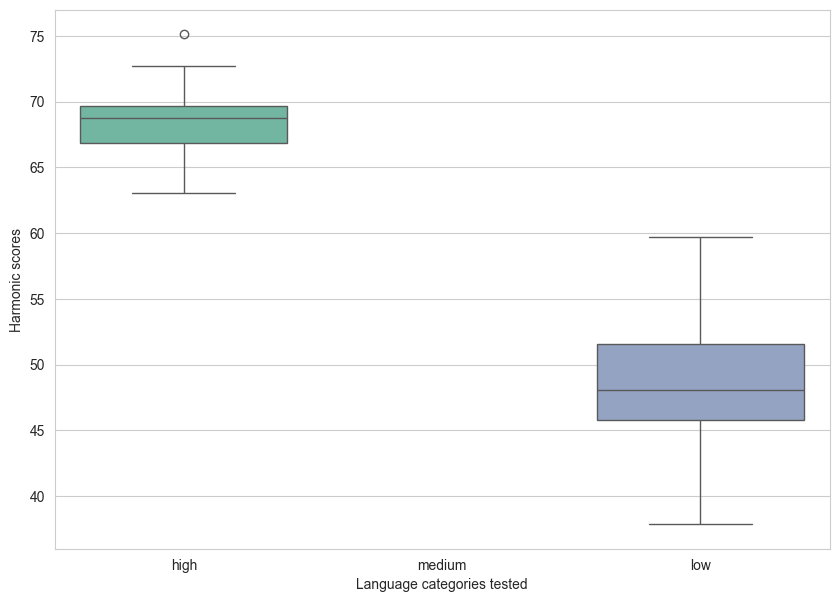

In [29]:
df_in_out_harmo = compute_df_harmonic(df_in_out_ref_all, df_in_out_over_all)
df_harmonic_with_cat_in =df_in_out_harmo.loc['In'].reindex(lg_eval)
df_harmonic_with_cat_in['cat'] = ["high"]*8+["medium"]*3+["low"]*7 

# Melt the DataFrame to long format for easier plotting with seaborn
df_melted = df_harmonic_with_cat_in.melt(id_vars=['cat'], value_vars=df_harmonic_with_cat_in.columns.drop('cat'), var_name='language', value_name='value')

# Plot the boxplot using seaborn
fig, ax = plt.subplots(figsize=(10,7))  
sns.boxplot(data=df_melted, x='cat', y='value', hue='cat', palette='Set2', legend=False)

ax.set_xlabel('Language categories tested')
ax.set_ylabel('Harmonic scores')

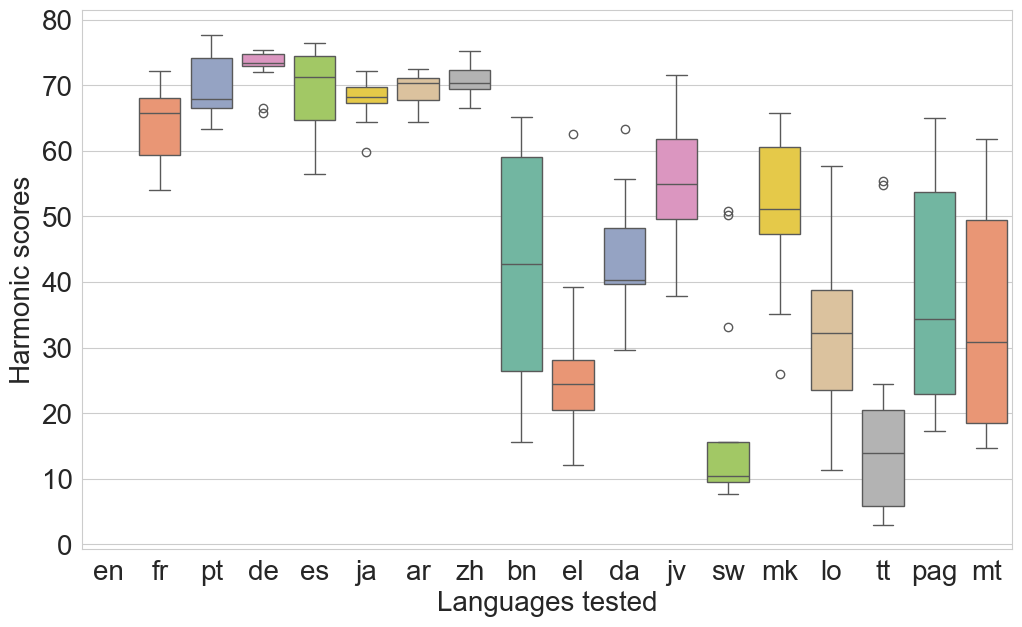

In [30]:
fig, ax = plt.subplots(figsize=(12,7))  
sns.boxplot(df_in_out_harmo.loc['Out'].reindex(lg_eval).transpose(), palette="Set2")
ax.set_xlabel('Languages tested', fontsize=20)
ax.set_ylabel('Harmonic scores', fontsize=20)
#ax.set_title('Harmonic scores for out distribution languages')
ax.tick_params(axis='both', which='major', labelsize=20)

Text(0, 0.5, 'Harmonic scores')

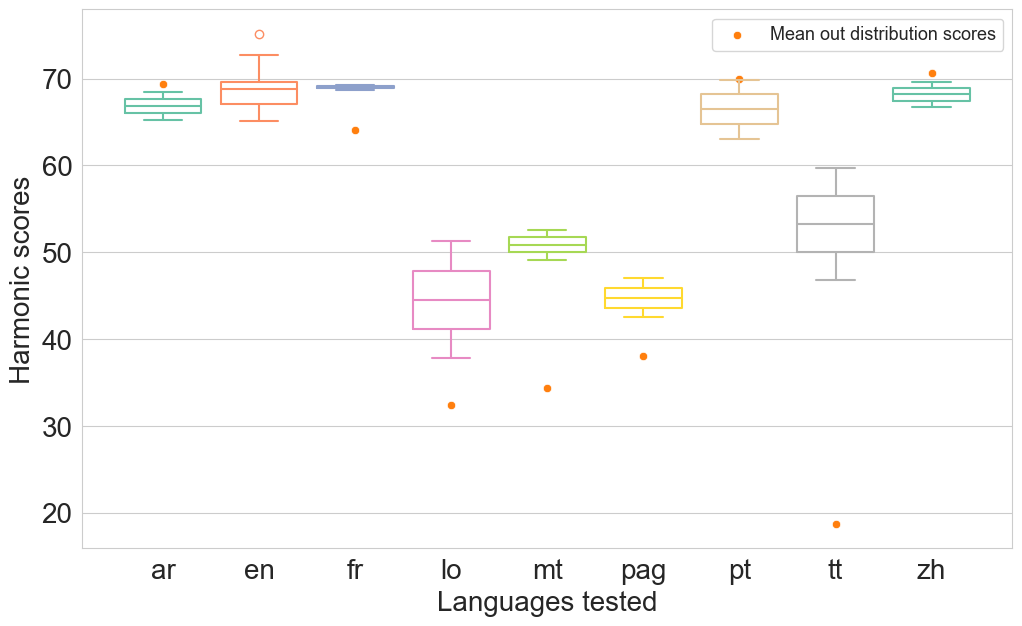

In [31]:
fig, ax = plt.subplots(figsize=(12,7))  
sns.boxplot(df_in_out_harmo.loc['In'].transpose(), palette="Set2", ax=ax, fill=False)
sns.scatterplot(df_in_out_harmo.loc['Out'].transpose().mean().reindex(df_in_out_harmo.loc['In'].transpose().index), ax=ax, legend="auto", label="Mean out distribution scores")
ax.legend(fontsize=13)
ax.set_xlabel('Languages tested', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_ylabel('Harmonic scores', fontsize=20)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'In-High'),
  Text(1.5, 0, 'In-Medium'),
  Text(2.5, 0, 'In-Low'),
  Text(3.5, 0, 'Out-High'),
  Text(4.5, 0, 'Out-Medium'),
  Text(5.5, 0, 'Out-Low')])

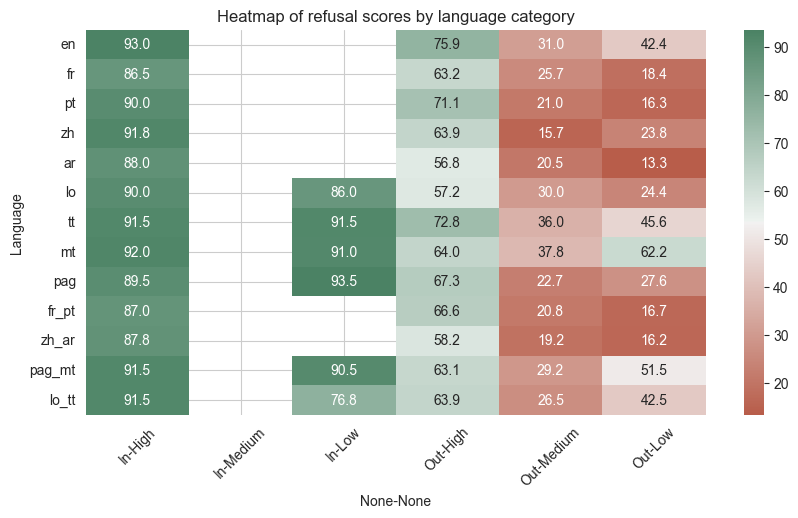

In [32]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(df_in_out_ref_cat, annot=True, fmt=".1f", cmap=sns.diverging_palette(20, 145, s=60, as_cmap=True), ax=ax)
plt.title(f"Heatmap of refusal scores by language category")
plt.xticks(rotation=45)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'In-High'),
  Text(1.5, 0, 'In-Medium'),
  Text(2.5, 0, 'In-Low'),
  Text(3.5, 0, 'Out-High'),
  Text(4.5, 0, 'Out-Medium'),
  Text(5.5, 0, 'Out-Low')])

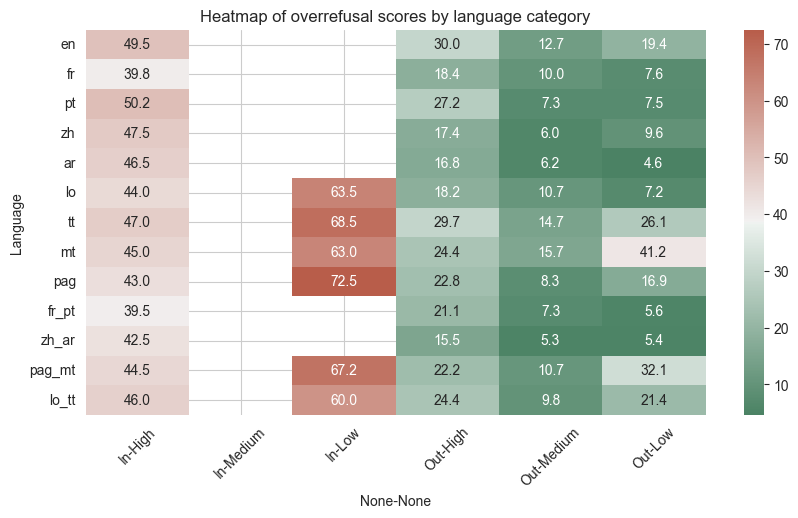

In [33]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(df_in_out_over_cat, annot=True, fmt=".1f", cmap=sns.diverging_palette(145, 20, s=60, as_cmap=True), ax=ax)
plt.title(f"Heatmap of overrefusal scores by language category")
plt.xticks(rotation=45)

In [34]:
df = compute_df_harmonic(df_in_out_ref_cat, df_in_out_over_cat)
df = df.drop([('In','Medium')], axis=1)
row_en = df.loc['en']

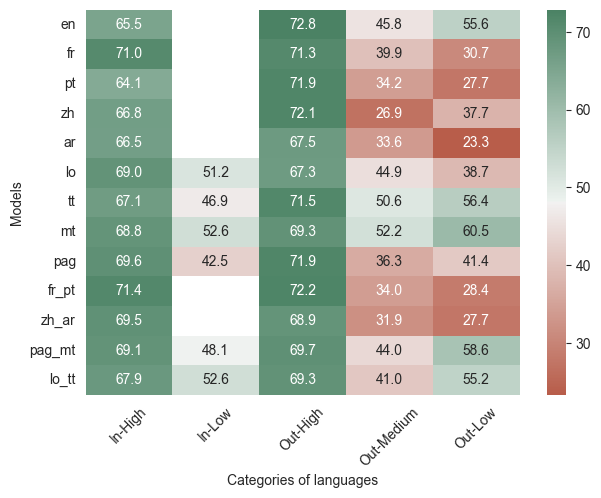

In [35]:
fig, ax = plt.subplots(figsize=(7,5))  
sns.heatmap(df, annot=True, fmt=".1f", cmap=sns.diverging_palette( 20, 145, s=60, as_cmap=True), ax=ax)
#plt.title(f"Heatmap of harmonic scores by language category")
plt.xticks(rotation=45)
plt.ylabel(f"Models")
plt.xlabel(f"Categories of languages")
plt.grid(None)


In [36]:
df_out=df['Out']
row_en = df_out.loc["en"]
print(row_en)
print(df_out)
df_out_diff = df_out.apply(lambda x: x-row_en, axis=1)
print(df_out_diff)

High      72.843857
Medium    45.757746
Low       55.602852
Name: en, dtype: float64
               High     Medium        Low
Language                                 
en        72.843857  45.757746  55.602852
fr        71.256329  39.942363  30.726167
pt        71.947693  34.240469  27.695338
zh        72.060770  26.857143  37.664433
ar        67.491964  33.648688  23.322063
lo        67.328219  44.916201  38.656828
tt        71.513872  50.637363  56.391097
mt        69.306039  52.233743  60.493462
pag       71.908905  36.345967  41.416541
fr_pt     72.230103  34.018600  28.398163
zh_ar     68.926419  31.878965  27.682417
pag_mt    69.703570  43.975621  58.573702
lo_tt     69.252140  40.961429  55.169282
              High     Medium        Low
Language                                
en        0.000000   0.000000   0.000000
fr       -1.587528  -5.815383 -24.876685
pt       -0.896164 -11.517277 -27.907514
zh       -0.783087 -18.900604 -17.938419
ar       -5.351893 -12.109058 -32.28079

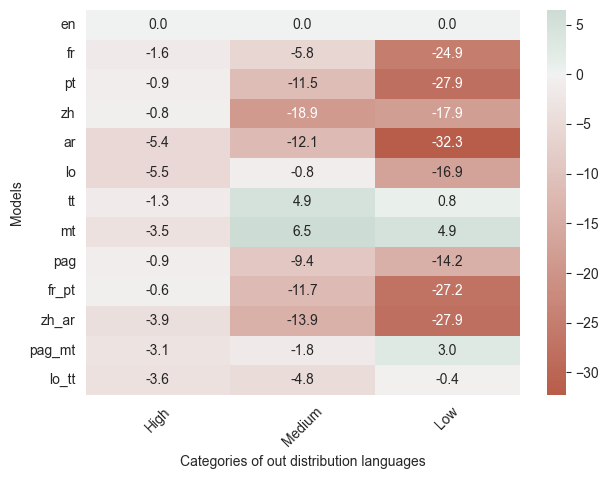

In [37]:
fig, ax = plt.subplots(figsize=(7,5))  
sns.heatmap(df_out_diff, annot=True, fmt=".1f", cmap=sns.diverging_palette(20, 150, s=60, as_cmap=True), ax=ax, center=0)
#plt.title(f"Heatmap of harmonic scores by language category")
plt.xticks(rotation=45)
plt.ylabel(f"Models")
plt.xlabel(f"Categories of out distribution languages")
plt.grid(None)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'en'),
  Text(1.5, 0, 'fr'),
  Text(2.5, 0, 'pt'),
  Text(3.5, 0, 'zh'),
  Text(4.5, 0, 'ar'),
  Text(5.5, 0, 'lo'),
  Text(6.5, 0, 'tt'),
  Text(7.5, 0, 'mt'),
  Text(8.5, 0, 'pag'),
  Text(9.5, 0, 'fr_pt'),
  Text(10.5, 0, 'zh_ar'),
  Text(11.5, 0, 'pag_mt'),
  Text(12.5, 0, 'lo_tt')])

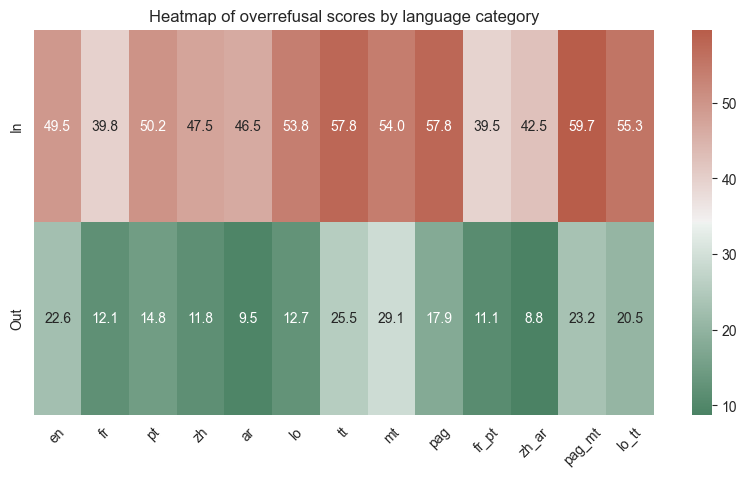

In [38]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(df_in_out_over, annot=True, fmt=".1f", cmap=sns.diverging_palette(145, 20, s=60, as_cmap=True), ax=ax)
plt.title(f"Heatmap of overrefusal scores by language category")
plt.xticks(rotation=45)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'en'),
  Text(1.5, 0, 'fr'),
  Text(2.5, 0, 'pt'),
  Text(3.5, 0, 'zh'),
  Text(4.5, 0, 'ar'),
  Text(5.5, 0, 'lo'),
  Text(6.5, 0, 'tt'),
  Text(7.5, 0, 'mt'),
  Text(8.5, 0, 'pag'),
  Text(9.5, 0, 'fr_pt'),
  Text(10.5, 0, 'zh_ar'),
  Text(11.5, 0, 'pag_mt'),
  Text(12.5, 0, 'lo_tt')])

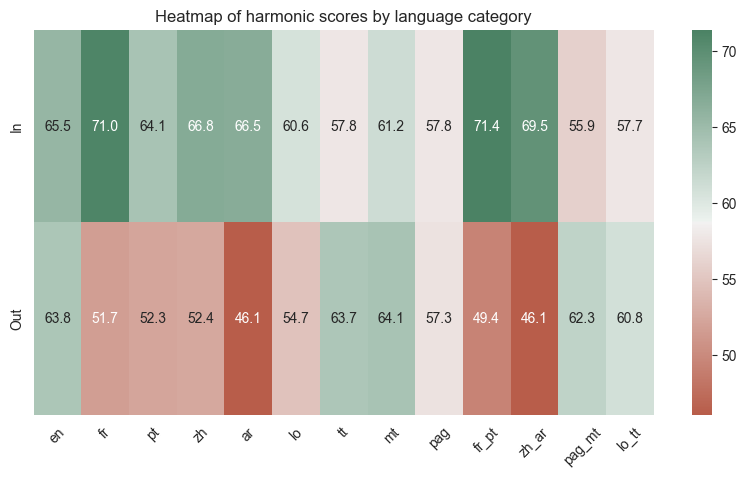

In [39]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(compute_df_harmonic(df_in_out_ref, df_in_out_over), annot=True, fmt=".1f", cmap=sns.diverging_palette(20, 145, s=60, as_cmap=True), ax=ax)
plt.title(f"Heatmap of harmonic scores by language category")
plt.xticks(rotation=45)

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_refusal_scatter_plot(refusal_df, over_refusal_df):
    """
    Create a scatter plot with refusal scores vs (1 - over_refusal scores)
    
    Parameters:
    refusal_df: DataFrame with languages as index, dataset compositions as columns
    over_refusal_df: DataFrame with languages as index, dataset compositions as columns
    """
    
    # Find common languages and compositions
    common_languages = refusal_df.index.intersection(over_refusal_df.index)
    common_compositions = refusal_df.columns.intersection(over_refusal_df.columns)
    
    print(f"\nCommon languages ({len(common_languages)}): {list(common_languages)}")
    print(f"Common compositions ({len(common_compositions)}): {list(common_compositions)}")
    
    if len(common_languages) == 0:
        raise ValueError("No common languages found between the two dataframes!")
    if len(common_compositions) == 0:
        raise ValueError("No common compositions found between the two dataframes!")
    
    # Use only common languages and compositions
    languages = common_languages
    compositions = common_compositions
    
    # Create color map for languages (18 languages)
    # Use multiple colormaps to get enough distinct colors
    colors1 = plt.cm.tab20(np.linspace(0, 1, 20))[:18]  # tab20 has 20 colors
    language_colors = dict(zip(languages, colors1))
    
    # Create marker map for dataset compositions (12 compositions)
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h', 'd', 'X',"8"]
    composition_markers = dict(zip(compositions, markers))
    
    # Create the plot with larger figure size for better visibility
    plt.figure(figsize=(10, 7))
    
    # Plot each combination of language and composition
    for lang in languages:
        for comp in compositions:
            try:
                x = refusal_df.loc[lang, comp]
                y = 100 - over_refusal_df.loc[lang, comp]  # 1 - over_refusal
                
                # Skip if either value is NaN
                if pd.isna(x) or pd.isna(y):
                    print(f"Warning: NaN value found for {lang}, {comp}. Skipping.")
                    continue
                
                plt.scatter(x, y, 
                           c=[language_colors[lang]], 
                           marker=composition_markers[comp],
                           s=60*len(comp.split("_"))**2,  # slightly smaller markers for less crowding
                           alpha=0.8,
                           edgecolors='black',
                           linewidth=0.3)
            except KeyError as e:
                print(f"KeyError for language '{lang}', composition '{comp}': {e}")
                continue
    
    # Create custom legends with smaller font size
    # Language legend (colors) - split into two columns if needed
    lang_handles = []
    for lang in languages:
        lang_handles.append(plt.scatter([], [], c=[language_colors[lang]], 
                                      marker='o', s=40, alpha=0.8, 
                                      edgecolors='black', linewidth=0.3))
    
    # Composition legend (markers)
    comp_handles = []
    for comp in compositions:
        comp_handles.append(plt.scatter([], [], c='gray', 
                                      marker=composition_markers[comp], 
                                      s=40*len(comp.split("_"))**2, alpha=0.8, 
                                      edgecolors='black', linewidth=0.3))
    
    # Add legends with smaller font and potentially multiple columns
    if len(languages) > 10:
        lang_legend = plt.legend(lang_handles, languages, 
                               title='Languages', loc='upper left', 
                               bbox_to_anchor=(1.02, 1), fontsize=9,
                               ncol=2, columnspacing=1)
    else:
        lang_legend = plt.legend(lang_handles, languages, 
                               title='Languages', loc='upper left', 
                               bbox_to_anchor=(1.02, 1), fontsize=9)
    
    plt.gca().add_artist(lang_legend)
    
    comp_legend = plt.legend(comp_handles, compositions, 
                           title='Dataset Compositions', loc='upper left', 
                           bbox_to_anchor=(1.02, 0.5), fontsize=9)
    
    # Labels and title
    plt.xlabel('Refusal Score', fontsize=12)
    plt.ylabel('100 - Over Refusal Score', fontsize=12)
    plt.title('Refusal Score vs (1 - Over Refusal Score) by Language and Dataset Composition', 
              fontsize=14, pad=20)
    
    # Grid for better readability
    plt.grid(True, alpha=0.3)
    
    # Adjust layout to accommodate legends (more space needed)
    plt.tight_layout()
    plt.subplots_adjust(right=0.7)  # More space for legends
    
    plt.show()



Common languages (2): ['In', 'Out']
Common compositions (13): ['en', 'fr', 'pt', 'zh', 'ar', 'lo', 'tt', 'mt', 'pag', 'fr_pt', 'zh_ar', 'pag_mt', 'lo_tt']


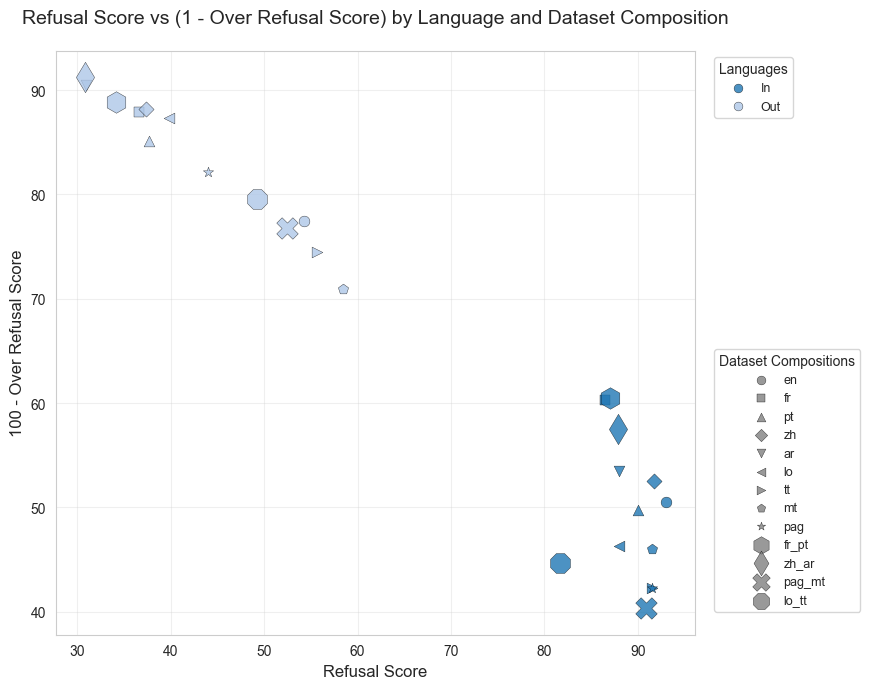

In [41]:
create_refusal_scatter_plot(df_in_out_ref, df_in_out_over)


Common languages (1): ['all']
Common compositions (13): ['en', 'fr', 'pt', 'zh', 'ar', 'lo', 'tt', 'mt', 'pag', 'fr_pt', 'zh_ar', 'pag_mt', 'lo_tt']


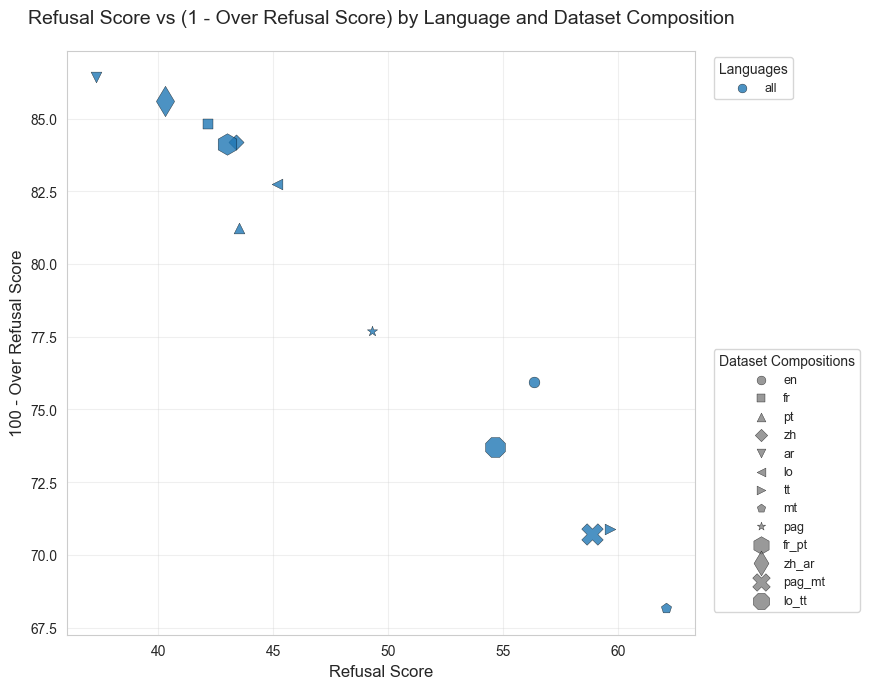

In [42]:
create_refusal_scatter_plot(pd.DataFrame(df_ref.mean(), columns=["all"]).transpose(), pd.DataFrame(df_over.mean(), columns=["all"]).transpose())


Common languages (1): ['all']
Common compositions (13): ['en', 'fr', 'pt', 'zh', 'ar', 'lo', 'tt', 'mt', 'pag', 'fr_pt', 'zh_ar', 'pag_mt', 'lo_tt']


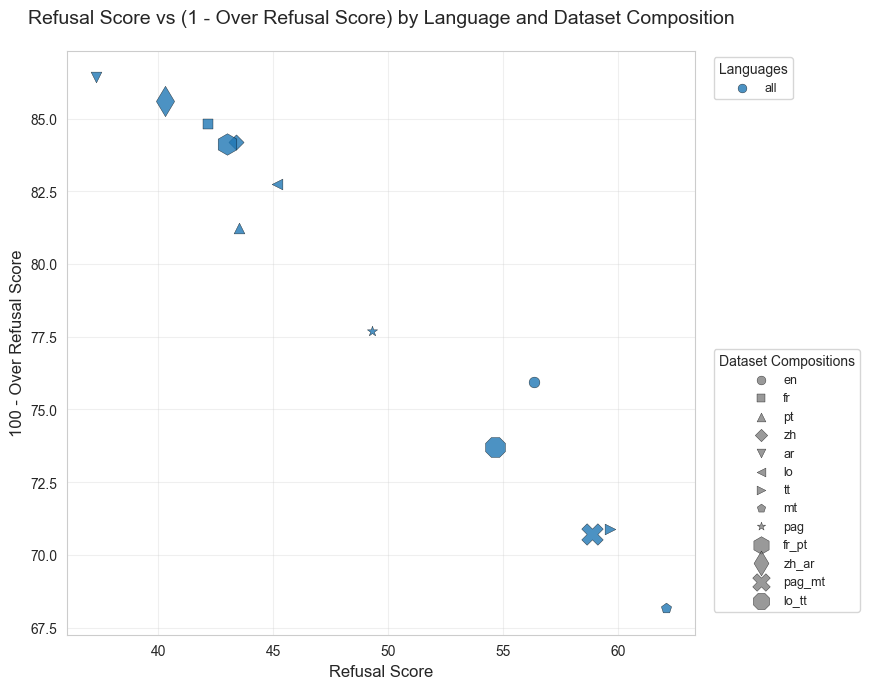

In [43]:
create_refusal_scatter_plot(pd.DataFrame(df_ref.mean(), columns=["all"]).transpose(), pd.DataFrame(df_over.mean(), columns=["all"]).transpose())


Common languages (6): [('In', 'High'), ('In', 'Medium'), ('In', 'Low'), ('Out', 'High'), ('Out', 'Medium'), ('Out', 'Low')]
Common compositions (13): ['en', 'fr', 'pt', 'zh', 'ar', 'lo', 'tt', 'mt', 'pag', 'fr_pt', 'zh_ar', 'pag_mt', 'lo_tt']


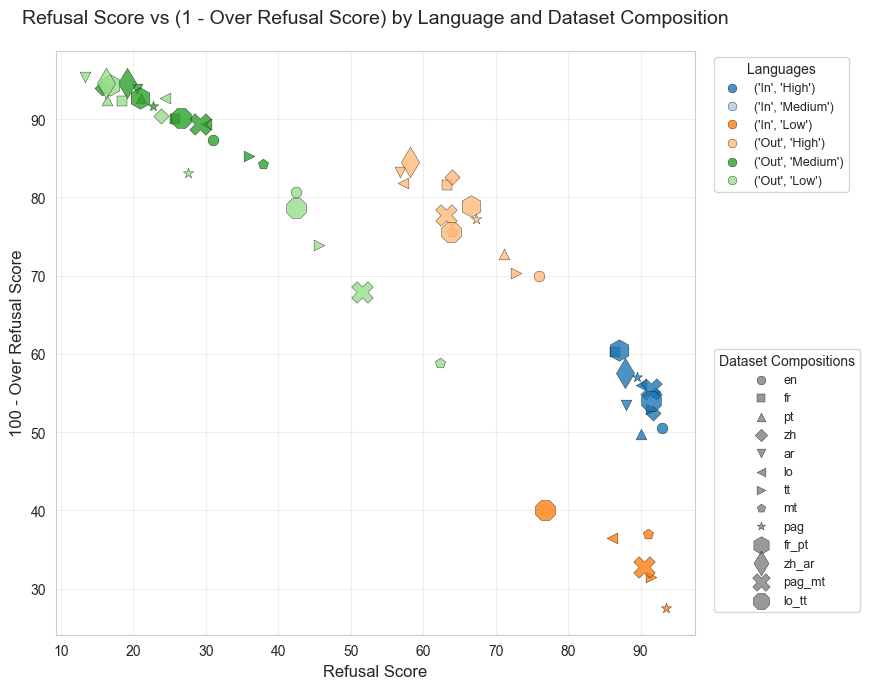

In [44]:
create_refusal_scatter_plot(df_in_out_ref_cat.transpose(), df_in_out_over_cat.transpose())